## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


Suggestion: follow the below plan of action:

* Get familiar with the data
* Select columns of interest
* Decide what to do with NaNs

* Make processing plan
* Develop code that works with a sample

* Adjust the code to work with Big data
* Test big data approach on a sample

* Run program with big data


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
path_to_searches = '../../../data/Challenge/searches.csv.bz2'
sample = pd.read_csv(path_to_searches, sep='^', nrows= 100000)

## Select the columns of interest

In [9]:
pd.options.display.max_columns = None
sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [8]:
sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [10]:
sample_cols = sample[['Destination', 'Date']]

## Make processing plan


* Filter Mad, Bcn, Agp
* Create YYYY-MM column
* Group by [destination, YYYY-MM]
* Sum
* Plot the results



### filter out the the searches for MAD, BCN, AGP

Take only the rows having MAD, BCN or AGP as destination

In [21]:
madbcnagp = (sample_cols['Destination'] == 'MAD') | (sample_cols['Destination'] == 'BCN') | (sample_cols['Destination'] == 'AGP')

In [24]:
madbcnagp = sample_cols['Destination'].isin(['MAD', 'BCN', 'AGP'])

In [27]:
of_interest = sample_cols[madbcnagp]
of_interest.head()

,Destination,Date
4,MAD,2013-01-01
93,AGP,2013-01-01
113,BCN,2013-01-01
147,AGP,2013-01-01
151,MAD,2013-01-01


We need to get the month from the Date column

We cannot use a datetime function on 'date' column as it is string

Options:

* Using string and obtaining yyyy-mm directly from it

* Transforming string to date:      

  * parse_dates=['Date'] - in csv_read function

  * pd.to_datetime  - function

### Option 1) use directly pd.to_datetime()

In [38]:
as_dates = pd.to_datetime(of_interest['Date'])

of_interest['Month'] = as_dates.apply(lambda dt: dt.month)
of_interest['Month'] = as_dates.dt.month
of_interest

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Destination,Date,Month
4,MAD,2013-01-01,1
93,AGP,2013-01-01,1
113,BCN,2013-01-01,1
147,AGP,2013-01-01,1
151,MAD,2013-01-01,1
165,BCN,2013-01-01,1
177,BCN,2013-01-01,1
186,BCN,2013-01-01,1
188,BCN,2013-01-01,1
208,BCN,2013-01-01,1


what do we have so far?

### Option 2) get PlotDate directly from the string

In [42]:
of_interest['PlotDate'] = of_interest['Date'].str[:7]
of_interest

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Destination,Date,Month,PlotDate
4,MAD,2013-01-01,1,2013-01
93,AGP,2013-01-01,1,2013-01
113,BCN,2013-01-01,1,2013-01
147,AGP,2013-01-01,1,2013-01
151,MAD,2013-01-01,1,2013-01
165,BCN,2013-01-01,1,2013-01
177,BCN,2013-01-01,1,2013-01
186,BCN,2013-01-01,1,2013-01
188,BCN,2013-01-01,1,2013-01
208,BCN,2013-01-01,1,2013-01


## group by arr_port search month

In [50]:
searches_per_airportmonth = of_interest.groupby(['Destination', 'PlotDate'])['Date'].count()
searches_per_airportmonth

Destination  PlotDate
AGP          2013-01     169
             2013-02     147
             2013-03     187
             2013-04      31
BCN          2013-01     517
             2013-02     497
             2013-03     536
             2013-04     174
MAD          2013-01     425
             2013-02     400
             2013-03     433
             2013-04     147
Name: Date, dtype: int64

In [51]:
searches_per_airportmonth.reset_index()

,Destination,PlotDate,Date
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517
5,BCN,2013-02,497
6,BCN,2013-03,536
7,BCN,2013-04,174
8,MAD,2013-01,425
9,MAD,2013-02,400


Again.....What do we have?


In [57]:
## Here we've just put together everything we've done with the sample

sample = pd.read_csv(path_to_searches, sep='^', nrows= 100000)

sample_cols = sample[['Destination', 'Date']]

madbcnagp = sample_cols['Destination'].isin(['MAD', 'BCN', 'AGP'])
of_interest = sample_cols[madbcnagp]

of_interest['PlotDate'] = of_interest['Date'].str[:7]

searches_per_airportmonth = of_interest.groupby(['Destination', 'PlotDate']).count()

unstacked = searches_per_airportmonth.reset_index()
unstacked.columns =[ 'Destination', 'PlotDate', 'Searches']

unstacked

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Destination,PlotDate,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517
5,BCN,2013-02,497
6,BCN,2013-03,536
7,BCN,2013-04,174
8,MAD,2013-01,425
9,MAD,2013-02,400


## 5) Adjust the code to work with Big data


Again, when adapting our code to use chunks, we'll process each chunk as we did the sample. After that, we'll need a way to merge the results from all chunks. In this case, it is to concatenate them and then `groupby` and `sum` again. 

In [63]:
chunks = pd.read_csv(path_to_searches, sep='^', nrows= 100000, chunksize=20000)
partial_results = []
chunk_number = 0

for chunk in chunks:
    print(chunk_number)
    sample_cols = chunk[['Destination', 'Date']]

    madbcnagp = sample_cols['Destination'].isin(['MAD', 'BCN', 'AGP'])
    of_interest = sample_cols[madbcnagp]

    of_interest['PlotDate'] = of_interest['Date'].str[:7]

    searches_per_airportmonth = of_interest.groupby(['Destination', 'PlotDate']).count()

    unstacked = searches_per_airportmonth.reset_index()
    unstacked.columns =[ 'Destination', 'PlotDate', 'Searches']
    
    partial_results.append(unstacked)
    
    chunk_number += 1
    
consolidated = pd.concat(partial_results)
aggregated = consolidated.groupby(['Destination', 'PlotDate']).sum()
aggregated

0


/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1
2
3
4


Searches
Destination PlotDate          
AGP         2013-01        169
            2013-02        147
            2013-03        187
            2013-04         31
BCN         2013-01        517
            2013-02        497
            2013-03        536
            2013-04        174
MAD         2013-01        425
            2013-02        400
            2013-03        433
            2013-04        147

In [64]:
chunks = pd.read_csv(path_to_searches, sep='^', chunksize=1000000)
partial_results = []
chunk_number = 0

for chunk in chunks:
    print(chunk_number)
    sample_cols = chunk[['Destination', 'Date']]

    madbcnagp = sample_cols['Destination'].isin(['MAD', 'BCN', 'AGP'])
    of_interest = sample_cols[madbcnagp]

    of_interest['PlotDate'] = of_interest['Date'].str[:7]

    searches_per_airportmonth = of_interest.groupby(['Destination', 'PlotDate']).count()

    unstacked = searches_per_airportmonth.reset_index()
    unstacked.columns =[ 'Destination', 'PlotDate', 'Searches']
    
    partial_results.append(unstacked)
    
    chunk_number += 1
    
consolidated = pd.concat(partial_results)
aggregated = consolidated.groupby(['Destination', 'PlotDate']).sum()
aggregated

/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0


/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1
2
3
4
5
6
7
8
9
10
11
12


/home/dani/anaconda3/envs/master-p3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


13
14
15
16
17
18
19
20


Searches
Destination PlotDate          
AGP         2013-01       9633
            2013-02       8379
            2013-03      10659
            2013-04       8265
            2013-05      10830
            2013-06       7923
            2013-07       8892
            2013-08       7866
            2013-09       8151
            2013-10       6499
            2013-11       6384
            2013-12       3696
BCN         2013-01      29469
            2013-02      28329
            2013-03      30552
            2013-04      31236
            2013-05      28728
            2013-06      26505
            2013-07      29241
            2013-08      27075
            2013-09      23427
            2013-10      20276
            2013-11      19824
            2013-12      15400
MAD         2013-01      24258
            2013-02      22800
            2013-03      24681
            2013-04      25251
            2013-05      26334
            2013-06      22800
            2013-07      22971
            2013-08      21831
            2013-09      21147
            2013-10      22294
            2013-11      20272
            2013-12      14504

## 4.3 Plotting

This time though, in order to plot it we need to reshape the data a bit. By using `reset_index` we transform the multiindex into regular columns. Then we can reshape the data to fit the shape we need with `pivot`

In [73]:
reseted = aggregated.reset_index()
pivoted = reseted.pivot(index='PlotDate', columns='Destination')
pivoted

Searches              
Destination      AGP    BCN    MAD
PlotDate                          
2013-01         9633  29469  24258
2013-02         8379  28329  22800
2013-03        10659  30552  24681
2013-04         8265  31236  25251
2013-05        10830  28728  26334
2013-06         7923  26505  22800
2013-07         8892  29241  22971
2013-08         7866  27075  21831
2013-09         8151  23427  21147
2013-10         6499  20276  22294
2013-11         6384  19824  20272
2013-12         3696  15400  14504

In [74]:
aggregated

Searches
Destination PlotDate          
AGP         2013-01       9633
            2013-02       8379
            2013-03      10659
            2013-04       8265
            2013-05      10830
            2013-06       7923
            2013-07       8892
            2013-08       7866
            2013-09       8151
            2013-10       6499
            2013-11       6384
            2013-12       3696
BCN         2013-01      29469
            2013-02      28329
            2013-03      30552
            2013-04      31236
            2013-05      28728
            2013-06      26505
            2013-07      29241
            2013-08      27075
            2013-09      23427
            2013-10      20276
            2013-11      19824
            2013-12      15400
MAD         2013-01      24258
            2013-02      22800
            2013-03      24681
            2013-04      25251
            2013-05      26334
            2013-06      22800
            2013-07      22971
            2013-08      21831
            2013-09      21147
            2013-10      22294
            2013-11      20272
            2013-12      14504

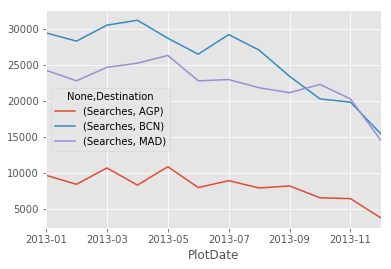

In [72]:
pivoted.plot()